# Project: Investigate a Dataset - [GapMinder World]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> GapMinder provides various data of global trends and population. It includes datasets of over 100 of indicators around the world in a timely manner, such as:
- Babies per woman over the years.
- Child mortality over the years.
- Average income per country over the years.
- Average life expectancy per country over the years.
- and other more. 


> From those indicators we can derive multiple insights and answer different questions.

> **In this notebook**, we are going to invistigate **4 indicators** related to the health field in the **6 Gulf countries** (Saudi Arabia, United Arab Emirates, Kuwait, Oman, Qatar, and Bahrain). The selected indicators are as follows:
- **1. Medical doctors**: The number of medical doctors per 1000 person per year.
- **2. Child mortality**: The total death of children under 5 years of age per 1000 live births.
- **3. Life expectancy**: The average number of years a new born child would live if the current mortality pattern stayed the same.
- **4. Government spendings in the health sector**: The amount of dollars spent in health per person per year.

> The Comma Seperated Value (CSV) data files have been downloaded from [GapMinder](https://www.gapminder.org/data/) website for those 4 indicators. 

### Questions for Analysis
> Based on the above indicators we will try to answer the following questions for the time period from 2008 to 2010:
- How is the health awarness in the gulf countries over the years from 2008 to 2010? Relaying on the number of deaths and medical doctors.
- Which country spent more in health over the period from 2008 to 2010?
- Do governments who spent high dollar amounts in health reported lower deaths and increased their life expectancy? is there a positive relationship?

> For sure you, as a reader, might address other questions that diffenetly can be answered. But to keep it short and simple, the above 3 questions will be answered during the analysis.

In [1]:
# import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, we will perform the following steps:
- 1. Load the csv files that contains the data of the 4 selected indicators. 
- 2. Trim, merge and clean the dataset for analysis. 


### Data General Properties
> Each csv file contains: 
- **List of countries** 
- and **the indicator value over the years**.

Lets load them..

In [2]:
# Loading child mortality data
child_mortality = pd.read_csv("child_mortality_0_5_year_olds_dying_per_1000_born.csv")
child_mortality.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30
2,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,United Arab Emirates,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,...,2.31,2.29,2.26,2.24,2.22,2.19,2.17,2.15,2.13,2.13


**Observation:** the child mortality dataset contains the total death of children under 5 years of age per 1000 live births from 1800 to 2100 (expected) for different countries.

In [3]:
# Loading medical doctors data
medical_doctors = pd.read_csv("medical_doctors_per_1000_people.csv")
medical_doctors.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.035,NaN,NaN,NaN,NaN,0.063,NaN,NaN,NaN,...,0.236,0.252,0.241,0.285,0.298,0.285,0.278,NaN,NaN,NaN
2,Angola,0.067,NaN,NaN,NaN,NaN,0.076,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215,NaN,NaN
3,Albania,0.276,NaN,NaN,NaN,NaN,0.481,NaN,NaN,NaN,...,1.230,1.220,1.270,1.280,NaN,NaN,1.220,NaN,2.16,1.65
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.330,NaN,NaN,NaN,NaN


**Observation:** The medical doctors dataset contains the number of medical doctors per 1000 person over the years from 1960 till 2019. Moreover, it is obvious that this dataset includes missing data (NaNs) that need to be handled before analysis.

In [4]:
# Loading life expectancy data
life_expectancy = pd.read_csv("life_expectancy_years.csv")
life_expectancy.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


**Observation:** The life expectancy dataset contains the average number of years a new born child would live if the current mortality pattern stayed the same for the period from 1800 to 2100 (expected). Moreover, we can see that we have missing data for some countries that need to be considered.

In [5]:
# Loading government spendings in the health sector data
gov_health_spending_per_person = pd.read_csv("government_health_spending_per_person_us.csv")
gov_health_spending_per_person.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833,1.25,1.61,2.52,2.81,3.5,3.75,3.91,4.39
1,Angola,13.5,8.72,10.5,6.65,6.55,12.5,18.3,14.300,19.40,19.70,27.10,50.90,68.4,126.00,181.00,102.00
2,Albania,13.9,17.10,14.2,18.60,28.10,27.2,30.5,32.500,40.60,63.90,71.40,75.50,88.8,109.00,107.00,94.00
3,Andorra,897.0,983.00,967.0,1340.00,942.00,862.0,890.0,1020.000,1300.00,1520.00,1630.00,1850.00,2100.0,2370.00,2360.00,2170.00
4,United Arab Emirates,583.0,580.00,588.0,565.00,559.00,577.0,638.0,578.000,611.00,588.00,608.00,659.00,718.0,1010.00,1310.00,1080.00


**Observation:** The government spendings in the health sector dataset contains the amount of dollars spent in health per person per year. The data also contains nulls.


### Data Cleaning
> Since we have the data split into 4 dataframes, we need to merge/join them in one. However, we first need to eliminate out-of-scope fields (years > 2010 and years < 2008). Thus, we will perform the following steps:
- 1. Drop out of scope columns from all 4 dataframes.
- 2. Convert columns (years) to rows so that the data will be: country, year, indicator value
- 3. Merge 4 dataframes into one.
- 4. Check for nulls and handle missing data.
- 5. Create a dataframe including Gulf countries data only.
 

### Step 1: Drop unrelated fields

In [6]:
# Step 1: delete unrelated fields
def drop_out_of_scope_columns(df):
    # Select period, in this report the data period is from 2008 to 2010
    scope_columns = np.arange(2008,2011,1)
    # convert np.array items to str 
    scope_columns = scope_columns.astype(str)
    
    # append the country field to the selected data period
    scope_columns= np.append(scope_columns, 'country')
    
    # return a dataframe after dropping unrelated fields
    return df.drop(columns=[col for col in df if col not in scope_columns])

In [7]:
child_mortality_2008_2010 = drop_out_of_scope_columns(child_mortality)
child_mortality_2008_2010.head()

,country,2008,2009,2010
0,Afghanistan,96.00,91.90,88.00
1,Angola,138.00,129.00,120.00
2,Albania,15.50,14.40,13.30
3,Andorra,4.62,4.39,4.18
4,United Arab Emirates,8.93,8.69,8.48


In [8]:
medical_doctors_2008_2010 = drop_out_of_scope_columns(medical_doctors)
medical_doctors_2008_2010.head()

,country,2008,2009,2010
0,Aruba,NaN,NaN,NaN
1,Afghanistan,0.174,0.213,0.236
2,Angola,NaN,0.131,NaN
3,Albania,NaN,1.230,1.230
4,Andorra,NaN,3.150,NaN


In [9]:
life_expectancy_2008_2010 = drop_out_of_scope_columns(life_expectancy)
life_expectancy_2008_2010.head()

,country,2008,2009,2010
0,Afghanistan,59.2,59.9,60.5
1,Angola,58.8,59.5,60.2
2,Albania,77.6,78.0,78.1
3,Andorra,81.8,81.8,81.8
4,United Arab Emirates,70.4,70.6,70.8


In [10]:
gov_health_spending_per_person_2008_2010 = drop_out_of_scope_columns(gov_health_spending_per_person)
gov_health_spending_per_person_2008_2010.head()

,country,2008,2009,2010
0,Afghanistan,3.75,3.91,4.39
1,Angola,126.00,181.00,102.00
2,Albania,109.00,107.00,94.00
3,Andorra,2370.00,2360.00,2170.00
4,United Arab Emirates,1010.00,1310.00,1080.00


### Step 2: Convert columns to rows 
Previous fields:
**country, 2008, 2009, 2010**


Converted fields:
**country, year, indicator value**

In [11]:
# convert columns to rows
child_mortality_2008_2010 = child_mortality_2008_2010.melt(id_vars=["country"], 
        var_name="year",
        value_name="total_childer_death_per_1000_births")

medical_doctors_2008_2010 = medical_doctors_2008_2010.melt(id_vars=["country"], 
        var_name="year", 
        value_name="medical_doctors_per_1000_people")

life_expectancy_2008_2010 = life_expectancy_2008_2010.melt(id_vars=["country"], 
        var_name="year", 
        value_name="avg_living_years")

gov_health_spending_per_person_2008_2010 = gov_health_spending_per_person_2008_2010.melt(id_vars=["country"], 
        var_name="year", 
        value_name="gov_health_spending_per_person($)")

### Step 3: Merge 4 dataframes to 1  

In [12]:
# merge datasets to 1 dataframe
df = pd.merge(child_mortality_2008_2010, medical_doctors_2008_2010, on=['country','year'])
df = pd.merge(df, life_expectancy_2008_2010, on=['country','year'])
df = pd.merge(df, gov_health_spending_per_person_2008_2010, on=['country','year'])


df.head()

,country,year,total_childer_death_per_1000_births,medical_doctors_per_1000_people,avg_living_years,gov_health_spending_per_person($)
0,Afghanistan,2008,96.00,0.174,59.2,3.75
1,Angola,2008,138.00,NaN,58.8,126.00
2,Albania,2008,15.50,NaN,77.6,109.00
3,Andorra,2008,4.62,NaN,81.8,2370.00
4,United Arab Emirates,2008,8.93,1.640,70.4,1010.00


In [13]:
df.shape

(570, 6)

**Observation:** The dataset contains 570 records and 6 columns.

In [14]:
df.describe()

,total_childer_death_per_1000_births,medical_doctors_per_1000_people,avg_living_years,gov_health_spending_per_person($)
count,570.000000,394.000000,570.000000,561.000000
mean,39.185175,1.952049,70.100702,716.343904
std,40.334109,1.712035,8.594908,1304.091032
min,2.620000,0.014100,32.500000,1.180000
25%,8.845000,0.402250,63.725000,33.800000
50%,20.600000,1.690000,72.100000,160.000000
75%,61.775000,3.055000,76.200000,600.000000
max,209.000000,7.630000,83.300000,6940.000000


**Observation:** There are missing data in **medical_doctors_per_1000_people** and **gov_health_spending_per_person($)** fields. Since all 4 columns are important in the analysis, we will exclude the rows that contains null in any field.

### Step 4: Find and drop null records

In [15]:
# drop rows missing one or more indicator (having null or NaN)
df_without_nulls = df.dropna()
# dataframe size after dropping nulls
df_without_nulls.shape

(388, 6)

**Observation:** The dataset size dropped after deleting null rows to 388 rows.

In [16]:
# the below code should result with false (no nulls) for all columns
df_without_nulls.isna().any(axis=0)

country                                False
year                                   False
total_childer_death_per_1000_births    False
medical_doctors_per_1000_people        False
avg_living_years                       False
gov_health_spending_per_person($)      False
dtype: bool

In [17]:
df_without_nulls.describe()

,total_childer_death_per_1000_births,medical_doctors_per_1000_people,avg_living_years,gov_health_spending_per_person($)
count,388.000000,388.000000,388.000000,388.000000
mean,32.138093,1.968497,71.506443,845.379974
std,36.264116,1.711113,8.083235,1386.649307
min,2.620000,0.014100,46.400000,1.180000
25%,6.320000,0.438250,66.500000,43.050000
50%,17.100000,1.715000,73.400000,255.500000
75%,45.300000,3.065000,78.175000,767.000000
max,180.000000,7.630000,83.300000,6940.000000


**Observation:** After removing rows with missing data, we can see the following about the 388 countries in the period from 2008 to 2010:
- The average children death for 388 countries was 32 deaths per 1000 births.

- The average number of medical doctors was 1 doctor per 1000 people.

- The average living years for people in those 388 countries was 71 years.

- The government health spendings per person ranges between 1.18 to 6940 US dollars.



### Step 5: Create a dataframe including Gulf countries data only (Report scope)

In [18]:
gulf_df = df_without_nulls.loc[df_without_nulls['country'].isin(["United Arab Emirates", "Bahrain", "Kuwait", "Qatar", "Saudi Arabia", "Oman"])]
gulf_df      

,country,year,total_childer_death_per_1000_births,medical_doctors_per_1000_people,avg_living_years,gov_health_spending_per_person($)
4,United Arab Emirates,2008,8.93,1.640,70.4,1010.0
17,Bahrain,2008,9.35,0.990,74.0,565.0
94,Kuwait,2008,10.90,1.880,78.1,874.0
132,Oman,2008,12.00,1.890,70.0,366.0
142,Qatar,2008,9.50,3.210,72.5,1300.0
146,Saudi Arabia,2008,13.80,2.060,71.4,375.0
194,United Arab Emirates,2009,8.69,1.520,70.6,1310.0
207,Bahrain,2009,8.92,0.970,74.5,540.0
284,Kuwait,2009,10.70,1.890,78.7,1350.0
322,Oman,2009,11.80,1.930,70.2,410.0


In [19]:
gulf_df.shape

(18, 6)

In [20]:
gulf_df.describe()

,total_childer_death_per_1000_births,medical_doctors_per_1000_people,avg_living_years,gov_health_spending_per_person($)
count,18.000000,18.000000,18.000000,18.000000
mean,10.383333,2.001611,73.127778,804.111111
std,1.663027,0.765443,3.098729,376.551830
min,8.480000,0.949000,70.000000,366.000000
25%,8.947500,1.550000,70.650000,435.250000
50%,9.950000,1.910000,72.150000,754.000000
75%,11.775000,2.327500,74.375000,1132.500000
max,13.800000,3.730000,80.100000,1350.000000


**Observation:** From the result above, we can derive the following health facts of gulf countries in the period from 2008 to 2010: 
- The average children death under the age of 5 was 10 deaths per 1000 births, so the average deaths of children under 5 is around 1% of the births.

- On average gulf countries had 2 doctor per 1000 people in 2008 to 2010.

- People live between 70 to 80 years in gulf countries. 

- The gulf countries governments spent between 366 to 1350 US dollars per person for health purposes with an average of $804.



Now the data is ready for further analysis to answer the predefined questions.

<a id='eda'></a>
## Exploratory Data Analysis
In this section, the 4 indicators will be briefly explored before going deep to answer the defined questions.


### Before answering the defined questions, lets explore the 4 indicators for gulf countries.
Since the values for all indicators are numeric, so using boxplot will give an overview of the values, such as minimum, maximum, mean, and outlairs.

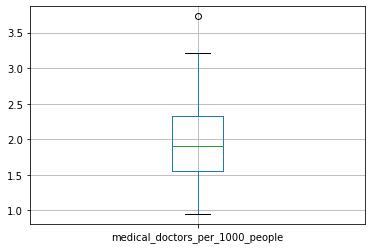

In [21]:
# plot a boxplot for each indicator
gulf_df.boxplot(column='medical_doctors_per_1000_people', figsize=(6, 4))

**Observatio:** The number of medical doctors per 1000 people in the gulf countries ranges between 1.6 to 2.3 doctors. However, on average gulf countries had around 2 doctor per 1000 people in 2008 to 2010.
Moreover, there is one outlair having > 3 doctors per 1000 people.

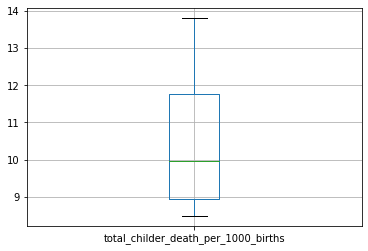

In [22]:
gulf_df.boxplot(column='total_childer_death_per_1000_births', figsize=(6, 4))

**Observatio:** The average children death for gulf countries was 10 deaths per 1000 births. 

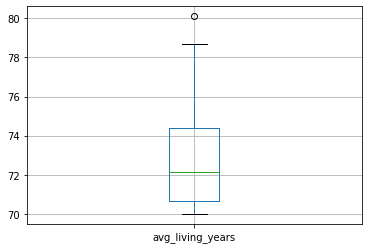

In [23]:
gulf_df.boxplot(column='avg_living_years', figsize=(6, 4))

**Observatio:** People in gulf countries live between 70 to 80 years with an average of 72 years.

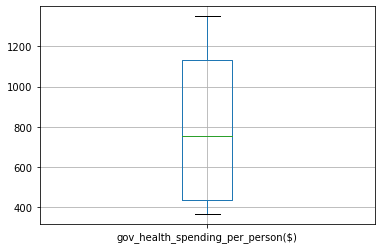

In [24]:
gulf_df.boxplot(column='gov_health_spending_per_person($)', figsize=(6, 4))

**Observatio:** The gulf countries governments spent between 366 to 1350 US dollars per person for health purposes with an average below $800.

### Research Question 1: How is the health awarness in the gulf countries over the years from 2008 to 2010? 
Relaying on the number of deaths and medical doctors.

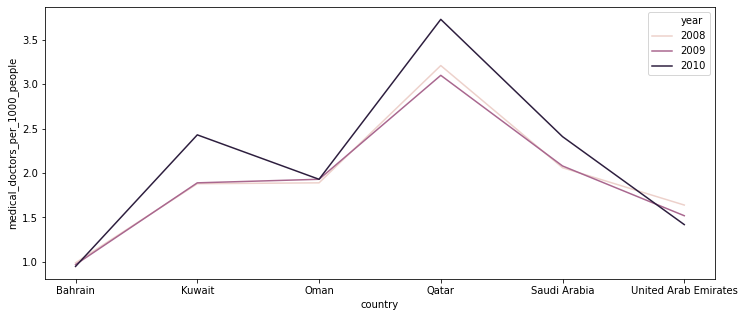

In [25]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 5)) 

sns.lineplot(
    data=gulf_df,
    x="country", y="medical_doctors_per_1000_people",
    hue="year",
    ax=ax,
)

**Observation:** The above chart illustrates that the number of medical doctors per 1000 people has increased over the period from 2008 to 2010 in all gulf countries except for Bahrain and United Arab Emirates. In contrast, Bahrain and United Arab Emirates reported a decrease in the number of medical doctors per 1000 people in 2010 compared to 2008. However, multiple factors might be behind this reduction, such as increase in population compared to existing doctors. 

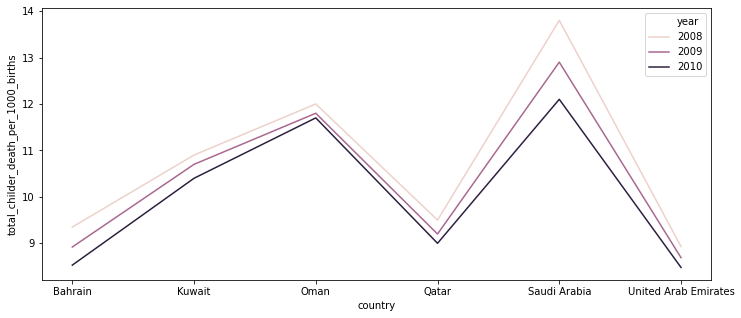

In [26]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 5)) 

sns.lineplot(
    data=gulf_df,
    x="country", y="total_childer_death_per_1000_births",
    hue="year",
    ax=ax,
)

**Observation:** The line plot above shows that the number of children under the age of 5 deaths reduced over the years.

**Answer of Research Question 1:** The number of children death decreased over the years which is a good indicator of health awareness. Moreover, more medical doctors have been allocated per 1000 people in most of gulf countries.

### Research Question 2: Which country spent more in health over the period from 2008 to 2010?

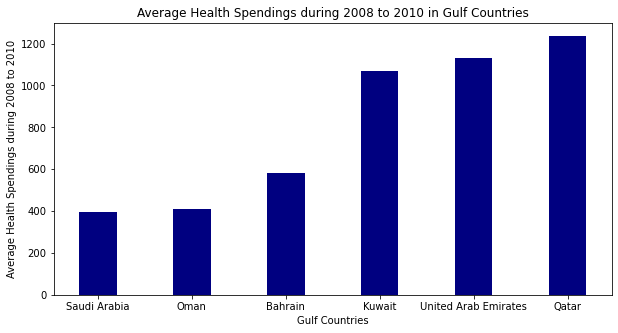

In [27]:
# Step 1: calculate the average health spendings for each country in the period 2008-2010
avg_spendings = gulf_df.groupby('country')['gov_health_spending_per_person($)'].mean().sort_values().to_frame(name = 'avg_spendings').reset_index()
# Step 2: Use barplot to find the top health spending country
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(avg_spendings['country'], avg_spendings['avg_spendings'], color ='navy',
        width = 0.4)
 
plt.xlabel("Gulf Countries")
plt.ylabel("Average Health Spendings during 2008 to 2010")
plt.title("Average Health Spendings during 2008 to 2010 in Gulf Countries")
plt.show()

**Answer of Research Question 2:** Qatar is the top gulf country in terms of spendings in the health sector per person.

### Research Question 3: Do governments who spent high dollar amounts in health reported lower deaths and increased their life expectancy? is there a positive relationship?

Based on question 2, Qatar, United Arab Emirates, and Kuwait are the top 3 gulf countries spending in health. Therefore, to answer this question (question 3) we explore the children mortality and life expectancy trends of these three countries over the years.

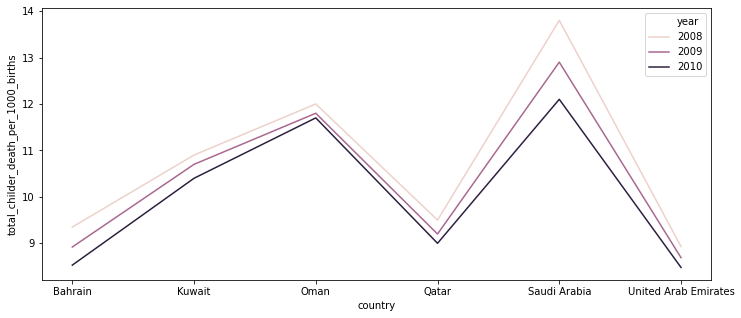

In [28]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 5)) 

sns.lineplot(
    # data = records of the top 3 gulf countries spending dollars in health per person
#     data=gulf_df.loc[gulf_df['country'].isin(avg_spendings.tail(3).country)],
    data = gulf_df,
    x="country", y="total_childer_death_per_1000_births",
    hue="year",
    ax=ax,
)

In [29]:
# the following code return the decrement ratio of children death in 2010 compared to 2008 in the top spending countries
gulf_df.loc[gulf_df['year'].isin(['2008', '2010'])].set_index('country').groupby('country')['total_childer_death_per_1000_births'].pct_change().multiply(100).to_frame(name = 'ratio').reset_index().dropna()

,country,ratio
6,United Arab Emirates,-5.039194
7,Bahrain,-8.770053
8,Kuwait,-4.587156
9,Oman,-2.500000
10,Qatar,-5.263158
11,Saudi Arabia,-12.318841


**Observation:** The chart above illustrates that the children mortality decreased over the years. However, we can not relate the children mortality reduction directly to the high spendings in health care per person. For instance, Saudi Arabia reported the lowest amount spending per person in health sector, yet it reported the highest reduction percentage in childern mortality (12.3%).

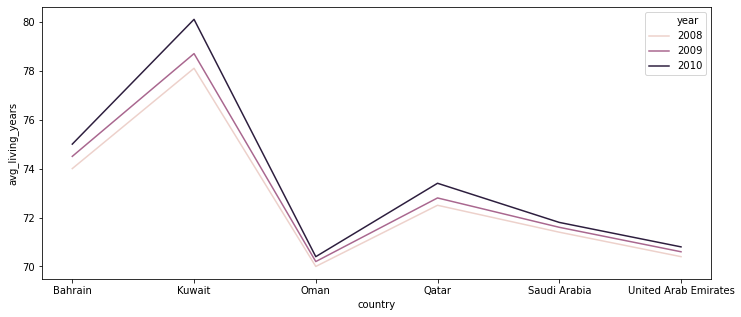

In [30]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 5)) 

sns.lineplot(
    # data = records of the top 3 gulf countries spending dollars in health per person
    data=gulf_df,
    x="country", y="avg_living_years",
    hue="year",
    ax=ax,
)

In [31]:
# the following code return the increment ratio in the living age in 2010 compared to 2008 in the top spending countries
gulf_df.loc[gulf_df['year'].isin(['2008', '2010'])].set_index('country').groupby('country')['avg_living_years'].pct_change().multiply(100).to_frame(name = 'ratio').reset_index().dropna()

,country,ratio
6,United Arab Emirates,0.568182
7,Bahrain,1.351351
8,Kuwait,2.560819
9,Oman,0.571429
10,Qatar,1.241379
11,Saudi Arabia,0.560224


**Observation:** The chart above illustrates that the people living age increased over the years. However, this increment also might directly relate to the high spendings in health care per person. From the results, United Arab Emirates is the second spending country, yet it reported increment ratio (0.56%) close to the lowest spending country (Saudi Arabia).

**Answer of Research Question 3:** Do governments who spent high dollar amounts in health reported lower deaths and increased their life expectancy? is there a positive relationship?

Well, the data shows that children deaths reduced and the life expectancy increased over the years. However, it does not show a direct relationship between this health improvement to the high spending by governments in the health care sector.

<a id='conclusions'></a>
## Conclusions

To sum up, the health status in gulf countries have positively improved over the years (children deaths reduced and the life expectancy and number of doctors increased). However, population also increased over the years and might effect the number of medical doctors allocated per 1000 person (few doctors compared to full population).
Additionally, Qatar, United Arab Emirates, and Kuwait spent more in health care sector compared to other gulf countries.
On the other hand, the data does not show a direct relationship between health improvement and high governments' spendings in the health care sector.

## Limitations:
This analysis was limited to a specific period (2008 to 2010) because governments spending in health sector data was not updated since 2010.Moreover, the analysis was limited to gulf countries. Besides, other unexplored factors (indicators) might have an impact on the analysis results.